In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from collections import Counter
from PIL import Image

from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor
from torchvision.datasets.folder import ImageFolder
from torchvision.utils import make_grid

## Data Exploration

In [2]:
root_path = Path('../')

dataset = ImageFolder(
    root=(root_path / 'data/train').as_posix(),
    loader=lambda p: Image.open(p).convert("L"),
)

dataset

Dataset ImageFolder
    Number of datapoints: 60000
    Root location: ../data/train

<PIL.Image.Image image mode=L size=28x28 at 0x2009B90FE50> (0, 255)


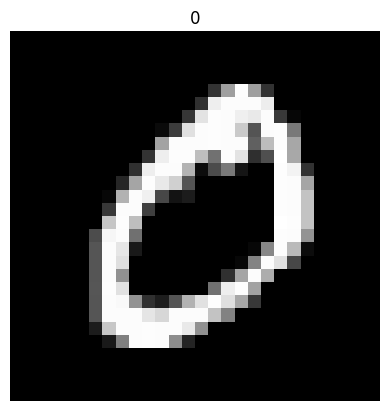

In [3]:
## Single data point
for img, label in dataset:
    print(img, img.getextrema())
    plt.imshow(img, cmap='gray')
    plt.axis(False)
    plt.title(label)

    plt.show()
    break

In [4]:
dataset.transform=Compose([
    ToTensor()
])

In [5]:
dataset[0][0].shape

torch.Size([1, 28, 28])

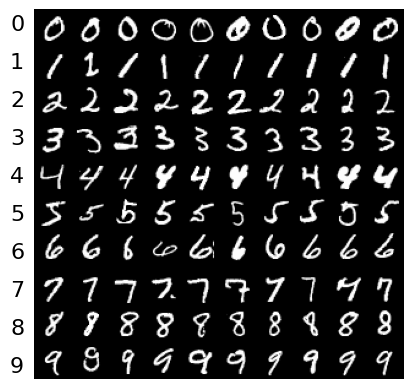

In [6]:
## A grid of images from each class
num_classes = 10
images_per_class = 10

# Create a list to store the images for each class
class_images = [[] for _ in range(num_classes)]

# Iterate over the dataset and collect the first `images_per_class` images for each class
for image, label in dataset:
    if len(class_images[label]) < images_per_class:
        class_images[label].append(image)
    if all(len(images) == images_per_class for images in class_images):
        break

# Create a single grid of images with one row per class
grid = make_grid([img for images in class_images for img in images], nrow=images_per_class)
plt.imshow(grid.permute(1, 2, 0))

# Add labels for each class at the start of the row
for i in range(num_classes):
    plt.text(-20, i * 31 + 17, str(i), fontsize=16)

plt.axis(False)
plt.show()

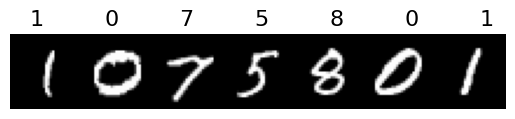

In [7]:
## Random images
dataloader = DataLoader(dataset, batch_size=7, shuffle=True)

for images, labels in dataloader:
    grid = make_grid(images)
    plt.imshow(grid.permute(1, 2, 0))

    # Add labels for the images
    for i, label in enumerate(labels):
        plt.text(i * 32 + 8, -4, str(label.item()), fontsize=16)

    plt.axis(False)
    plt.show()
    break

Mean: 6000.0, STD: 322.082908581005


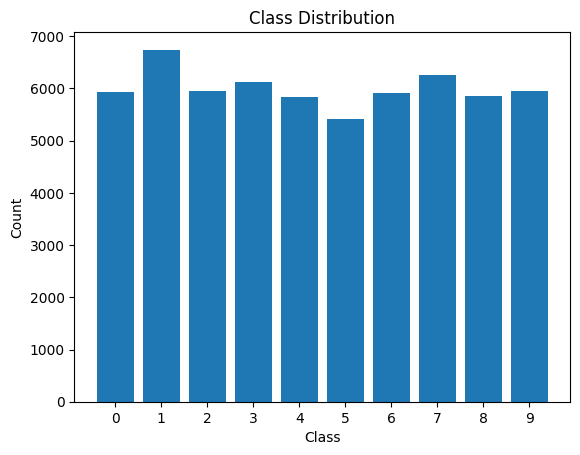

In [8]:
## Class distributions

# Get the labels for all images in the dataset
labels = [label for _, label in dataset]

# Count the number of occurrences of each label
label_counts = Counter(labels)
label_counts_array = np.array(list(label_counts.values()))

print(f"Mean: {label_counts_array.mean()}, STD: {label_counts_array.std()}")

# Plot the distribution of labels
plt.bar(list(label_counts.keys()), list(label_counts.values()))
plt.xticks(list(range(10)))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [9]:
elements = label_counts.most_common()
elements

[(1, 6742),
 (7, 6265),
 (3, 6131),
 (2, 5958),
 (9, 5949),
 (0, 5923),
 (6, 5918),
 (8, 5851),
 (4, 5842),
 (5, 5421)]

In [12]:
m, l = elements[0], elements[-1]
m, l

((1, 6742), (5, 5421))

In [13]:
m[1] - l[1]

1321

In [ ]:
from cleanlab import 